In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Exercise #1: Setup 

In [2]:
import os

foldername = "Files/"
bgd_files = ['Diboson.csv','Top.csv','Zjets.csv']
sig_files = ['ggH1000.csv']

bgd_df = []
sig_df = []
all_files = bgd_files + sig_files

for index, file in enumerate(all_files):
    x = os.path.getsize(foldername + file)/(1024*1024)
    print ('Opening file',file,'with size','{:.1f}'.format(x),'MB: ',end='')
    tmp = pd.read_csv(foldername + file, index_col=0)
    if index < len(bgd_files):
        bgd_df.append(tmp)
    else:
        sig_df.append(tmp)
    print ('Done')
    

Opening file Diboson.csv with size 32.1 MB: Done
Opening file Top.csv with size 18.7 MB: Done
Opening file Zjets.csv with size 1336.9 MB: Done
Opening file ggH1000.csv with size 10.4 MB: Done


In [3]:
import numpy as np
var = 'reco_zv_mass'
weight = 'FullEventWeight'
reco_mass = 'reco_zv_mass'
MeV2TeV = 1E6


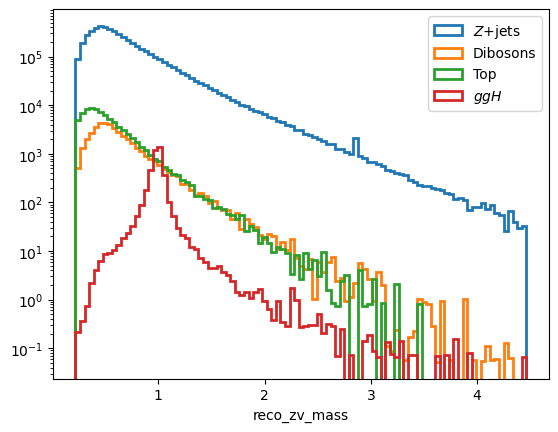

In [4]:
Nbins = 100
bins_ = np.linspace(min(sig_df[0][var]/MeV2TeV), max(sig_df[0][var]/MeV2TeV), Nbins)
plt.hist(bgd_df[2][var]/MeV2TeV, histtype='step', weights=bgd_df[2][weight], bins=bins_, label='$Z$+jets', linewidth=2)
plt.hist(bgd_df[0][var]/MeV2TeV, histtype='step', weights=bgd_df[0][weight], bins=bins_, label='Dibosons', linewidth=2)
plt.hist(bgd_df[1][var]/MeV2TeV, histtype='step', weights=bgd_df[1][weight], bins=bins_, label='Top', linewidth=2)
plt.hist(sig_df[0][var]/MeV2TeV, histtype='step', weights=sig_df[0][weight], bins=bins_, label='$ggH$', linewidth=2)
    
plt.xlabel(var)
plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [5]:
# mass spectrum, in TeV
xmin = 0.8
xmax = 1.4

def cuts0(df, applyMassCuts):
    if applyMassCuts:
        return df[(df[var] > (xmin * MeV2TeV)) & (df[var] < (xmax * MeV2TeV))]
    else:
        return df

def cuts(df, applyMassCuts):
#        return df[(df['lep1_pt'] > 150000) & (df['lep2_pt'] > 100000) & (df['fatjet_pt'] > 230000)
#             & (df['Zll_pt'] > 330000)]    
    if applyMassCuts:
        return df[(df['lep1_pt'] > 100000) & (df['lep2_pt'] > 100000) & (df['fatjet_pt'] > 150000)
                    & (df['Zll_pt'] > 250000) &
                  (df[var] > (xmin * MeV2TeV)) & (df[var] < (xmax * MeV2TeV))]
    else:
        return df[(df['lep1_pt'] > 100000) & (df['lep2_pt'] > 100000) & (df['fatjet_pt'] > 150000)
                    & (df['Zll_pt'] > 250000)]

def isSignal(df):
    return df[df['isSignal'] == 1]

def isBgd(df):
    return df[df['isSignal'] == 0]

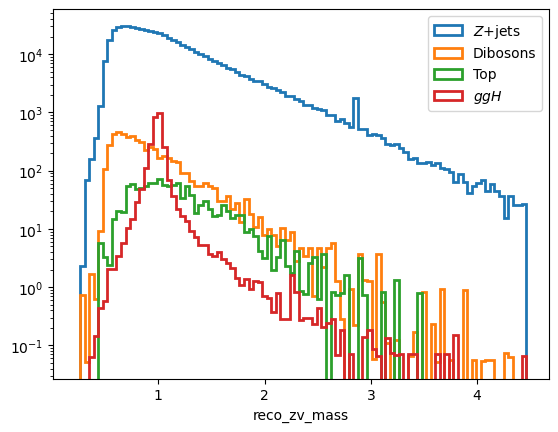

In [13]:
massCuts = False
bins_ = np.linspace(min(sig_df[0][var]/MeV2TeV), max(sig_df[0][var]/MeV2TeV), Nbins)
plt.hist(cuts(bgd_df[2], massCuts)[var]/MeV2TeV, histtype='step', weights=cuts(bgd_df[2], massCuts)[weight], bins=bins_, label='$Z$+jets', linewidth=2)
plt.hist(cuts(bgd_df[0], massCuts)[var]/MeV2TeV, histtype='step', weights=cuts(bgd_df[0], massCuts)[weight], bins=bins_, label='Dibosons', linewidth=2)
plt.hist(cuts(bgd_df[1], massCuts)[var]/MeV2TeV, histtype='step', weights=cuts(bgd_df[1], massCuts)[weight], bins=bins_, label='Top', linewidth=2)
plt.hist(cuts(sig_df[0], massCuts)[var]/MeV2TeV, histtype='step', weights=cuts(sig_df[0], massCuts)[weight], bins=bins_, label='$ggH$', linewidth=2)
    
plt.xlabel(var)
plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [14]:
# put together all background samples to produce one mega-DataFrame
totalBgd_df = pd.concat(bgd_df, ignore_index = True)
print ("total # of bgd entries before cuts =","{:,}".format(totalBgd_df.shape[0]))
print ("total # of sig entries before cuts =","{:,}".format(sig_df[0].shape[0]))
ratio = totalBgd_df.shape[0]/sig_df[0].shape[0]
print("Bgd-to-signal ratio before cuts =",ratio)
bgd_df_cuts0 = [cuts0(bgd_df[0], massCuts), cuts0(bgd_df[1], massCuts), cuts0(bgd_df[2], massCuts)]
bgdCuts0_df = pd.concat(bgd_df_cuts0, ignore_index = True)
sigCuts0_df = cuts0(sig_df[0], massCuts)
print ("\ntotal # of bgd entries within mass range =","{:,}".format(bgdCuts0_df.shape[0]))
print ("total # of sig entries within mass range =","{:,}".format(sigCuts0_df.shape[0]))
ratio_Cuts0 = bgdCuts0_df.shape[0]/sigCuts0_df.shape[0]
print("Bgd-to-signal ratio after mass cuts =",ratio_Cuts0)
bgd_df_cuts = [cuts(bgd_df[0], massCuts), cuts(bgd_df[1], massCuts), cuts(bgd_df[2], massCuts)]
bgdCuts_df = pd.concat(bgd_df_cuts, ignore_index = True)
sigCuts_df = cuts(sig_df[0], massCuts)
print ("\ntotal # of bgd entries within mass range after cuts =","{:,}".format(bgdCuts_df.shape[0]))
print ("total # of sig entries within mass range after cuts =","{:,}".format(sigCuts_df.shape[0]))
ratio_Cuts = bgdCuts_df.shape[0]/sigCuts_df.shape[0]
print("Bgd-to-signal ratio after selection cuts =",ratio_Cuts)

total # of bgd entries before cuts = 6,826,959
total # of sig entries before cuts = 50,013
Bgd-to-signal ratio before cuts = 136.50368904084937

total # of bgd entries within mass range = 6,826,959
total # of sig entries within mass range = 50,013
Bgd-to-signal ratio after mass cuts = 136.50368904084937

total # of bgd entries within mass range after cuts = 805,221
total # of sig entries within mass range after cuts = 33,432
Bgd-to-signal ratio after selection cuts = 24.085337401292175


In [15]:
sigbgd_beforeCuts = pd.concat([bgdCuts0_df, sigCuts0_df], ignore_index = True)

sigbgd = pd.concat([bgdCuts_df, sigCuts_df], ignore_index = True)


In [16]:
from my_util import Randomise
Answer_to_all_questions = 42
sigbgd = Randomise(sigbgd, Answer_to_all_questions)

print("total # of entries = ", "{:,}".format(sigbgd.shape[0]))
print("total # of signal entries = ", "{:,}".format(isSignal(sigbgd).shape[0]))
print("total # of background entries = ", "{:,}".format(isBgd(sigbgd).shape[0]))

total # of entries =  838,653
total # of signal entries =  33,432
total # of background entries =  805,221


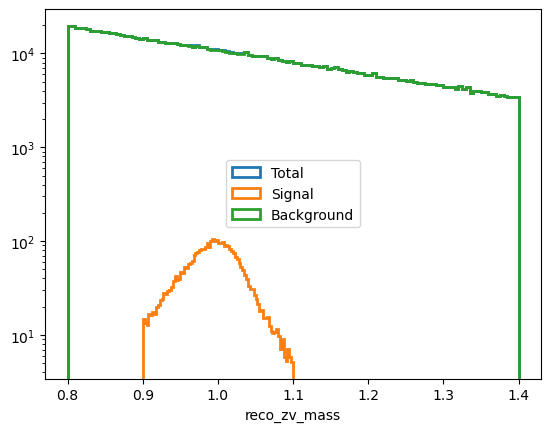

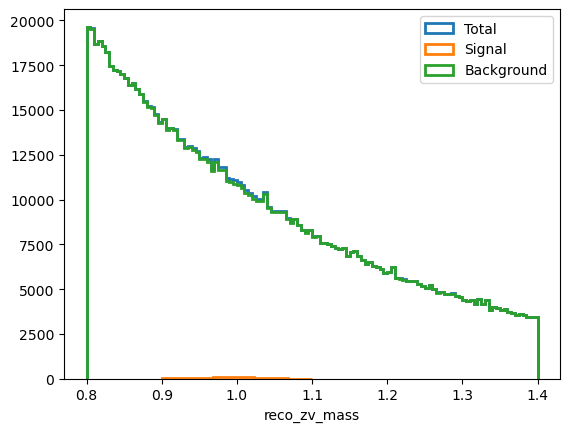

BEFORE cuts:
# of weighted histogram events: Sig= 3,547.8 Bgd= 1,100,300.4 Total= 1,104,293.8


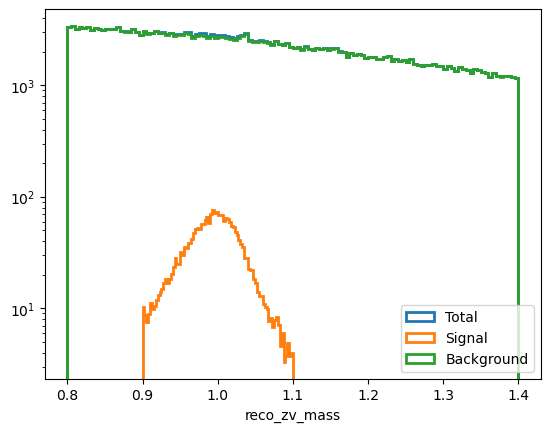

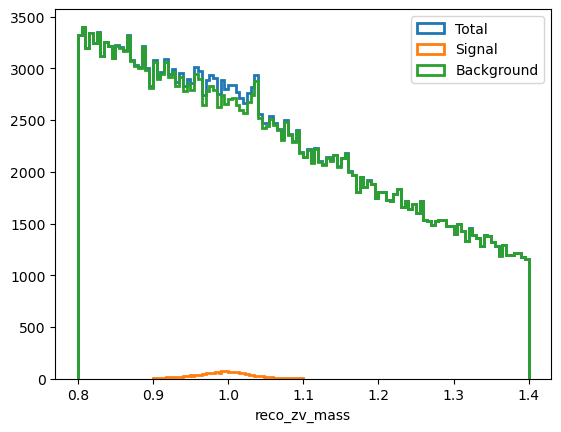

AFTER cuts:
# of weighted histogram events: Sig= 2,431.3 Bgd= 270,391.3 Total= 273,107.0


In [17]:
nbins_sig = 80
nbins = 120

# limit range to 0.9-1.1 TeV for signal to aid with fitting/modeling of signal
# mass spectrum, in TeV
xmin_sig = 0.9
xmax_sig = 1.1


# return scaled histograms (ie. by using 'FullEventWeight' column) for total, signal, background distributions
def plotSigBgd(xmin_, xmax_, nbins, DF):

    bins_ = np.linspace(xmin_, xmax_, nbins + 1)
    bins_sig_ = np.linspace(xmin_sig, xmax_sig, nbins_sig + 1)

    data = plt.hist(DF[var]/MeV2TeV, histtype='step', weights=DF[weight], bins=bins_, label='Total', linewidth=2)
    data_sig = plt.hist(isSignal(DF)[var]/MeV2TeV, histtype='step', weights=isSignal(DF)[weight], bins=bins_sig_, label='Signal', linewidth=2)
    data_bgd = plt.hist(isBgd(DF)[var]/MeV2TeV, histtype='step', weights=isBgd(DF)[weight], bins=bins_, label='Background', linewidth=2)
    plt.xlabel(var)
    plt.legend(loc='best')
    return data, data_sig, data_bgd

def printNumEvents(nbins, data, data_sig, data_bgd):
    Nsig = np.sum(data_sig[0]); Nbgd = np.sum(data_bgd[0]); Ntot = np.sum(data[0])
    print ("# of weighted histogram events: Sig=",'{:,.1f}'.format(Nsig),"Bgd=",'{:,.1f}'.format(Nbgd),"Total=",'{:,.1f}'.format(Ntot))



data0, data_sig0, data_bgd0 = plotSigBgd(xmin, xmax, nbins, sigbgd_beforeCuts)
plt.yscale('log')
plt.show()

plotSigBgd(xmin, xmax, nbins, sigbgd_beforeCuts)
plt.yscale('linear')
plt.show()


print("BEFORE cuts:")
printNumEvents(nbins, data0, data_sig0, data_bgd0)

data, data_sig, data_bgd = plotSigBgd(xmin, xmax, nbins, sigbgd)
plt.yscale('log')
plt.show()

plotSigBgd(xmin, xmax, nbins, sigbgd)
plt.yscale('linear')
plt.show()

print("AFTER cuts:")
printNumEvents(nbins, data, data_sig, data_bgd)


### Exercise #2: Employing a NN classifier 

In [18]:
# create a new dataset with equal #s of signal and background entries within xmin, xmax

# use dataset after selections-cuts (including mass-cuts) to train the NN 
Nsig = sigCuts_df.shape[0]
bgdCuts_df2 = Randomise(bgdCuts_df, Answer_to_all_questions)
sigbgd_tmp = [bgdCuts_df2[0:Nsig], sigCuts_df]
# merge these two dataframes into one
sigbgd_nn = pd.concat(sigbgd_tmp, ignore_index = True)
# randomise the new sample with equal #s of signal and background
sigbgd_nn = Randomise(sigbgd_nn, Answer_to_all_questions)
# check out the new dataframe
#print(sigbgd_nn.head(5))
print ("total # of entries =",sigbgd_nn.shape[0])
print ("# of signal entries in new DF =",len(sigbgd_nn[sigbgd_nn.isSignal == 1]))
print ("# of background entries in new DF =",len(sigbgd_nn[sigbgd_nn.isSignal == 0]))

total # of entries = 66864
# of signal entries in new DF = 33432
# of background entries in new DF = 33432


In [19]:
output = ['isSignal']
features = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET']
#features = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','reco_zv_mass']
features_plus = features + [reco_mass] + [weight]

# reduce to desired features + output
dataset = sigbgd_nn[features_plus + output]
print (dataset.shape)

data = dataset[features_plus].values
target = dataset[output].values
print (data.shape, target.shape)

(66864, 11)
(66864, 10) (66864, 1)


In [20]:
print(len(features_plus))
print(features_plus)

10
['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET', 'reco_zv_mass', 'FullEventWeight']


In [21]:
# feature scaling: we will now standardise the inputs (=scale their ranges so that they are roughly the same)
from sklearn import model_selection, preprocessing
sc = preprocessing.StandardScaler()

In [22]:
# construct and train the NN
Answer_to_all_questions = 42

# train-test split of dataset
train_data, test_data, train_target, test_target = model_selection.train_test_split(
    data, target, test_size=0.30, random_state=Answer_to_all_questions)

print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

# train_data2 and test_data2 have the event-weight & reco-mass columns removed
column_to_drop = len(features_plus)-1
k = 1 # 0 for row, 1 for column
train_data_tmp = np.delete(train_data, column_to_drop, k)
test_data_tmp = np.delete(test_data, column_to_drop, k)
column_to_drop = len(features_plus)-2
train_data2 = np.delete(train_data_tmp, column_to_drop, k)
test_data2 = np.delete(test_data_tmp, column_to_drop, k)

print(train_data2.shape, train_target.shape, test_data2.shape, test_target.shape)


(46804, 10) (46804, 1) (20060, 10) (20060, 1)
(46804, 8) (46804, 1) (20060, 8) (20060, 1)


In [23]:
# train_data3 and test_data3 have their features scaled in preparation for the NN
train_data3 = sc.fit_transform(train_data2)
test_data3 = sc.fit_transform(test_data2)

In [32]:
import torch

def xNumpyToTensor(array):
    array = np.array(array, dtype=np.float32) 
    return torch.from_numpy(array).type(torch.FloatTensor)

def yNumpyToTensor(array):
    array = np.array(array.astype(int))
    return torch.from_numpy(array).type(torch.FloatTensor)

train_data_tensor = xNumpyToTensor(train_data3)
train_target_tensor = yNumpyToTensor(train_target)
test_data_tensor = xNumpyToTensor(test_data3)
test_target_tensor = yNumpyToTensor(test_target)


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, log_loss

In [34]:
dropout = nn.Dropout(p=0.2)

# num of outputs = 1
num_outputs = 1

# num of inputs = 8 or 9
num_inputs = 8

def my_model(num_inputs, num_nodes):
    model = nn.Sequential(
		nn.Linear(num_inputs, num_nodes), nn.ReLU(), dropout,
		nn.Linear(num_nodes, num_nodes), nn.ReLU(), dropout,
		nn.Linear(num_nodes, num_nodes), nn.ReLU(), dropout,  
		nn.Linear(num_nodes, num_outputs),
		nn.Sigmoid()
	)
    return model

In [35]:
batchSize = 1200
N_epochs = 800
num_nodes = 40

model = my_model(num_inputs, num_nodes)

In [36]:
# Train the model
# train the model
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
all_losses = []
all_valid_accuracies = []

best_accuracy = 0.0  # Best validation accuracy seen so far
no_improvement_epochs = 0  # Count epochs with no improvement in validation accuracy


#Training in batches
for step in range(N_epochs):    
    model.train()
    out = model(train_data_tensor)                 # input x and predict based on x
    cost = loss_fn(out, train_target_tensor) 
    optimizer.zero_grad()   # clear gradients for next train
    cost.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients 

    step_size = 10
 
    loss = cost.item()
    all_losses.append(loss)

    if step % step_size == 0:       
        print(step, cost.data.cpu().numpy())

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        prediction = model(test_data_tensor)  # probabilities
        predicted_labels = (prediction > 0.5).float()  # Convert probabilities to 0 or 1
        actual_labels = test_target_tensor
        accuracy = (predicted_labels.eq(actual_labels).sum() / float(actual_labels.nelement())).item()  # Calculate the accuracy
        all_valid_accuracies.append(accuracy)
        if step % step_size == 0:       
            print('Validation accuracy: {:.1f}%'.format(accuracy * 100))
        
        # RuntimeError: can't convert CUDA tensor to numpy (it doesn't support GPU arrays). 
        # Use .cpu() to move the tensor to host memory first.        
        ####prediction = (model(test_data_tensor).data).float() # probabilities                  
        pred_y = prediction.cpu().numpy().squeeze()
        target_y = test_target_tensor.cpu().data.numpy()
        if step % step_size == 0:       
            print ('LOG_LOSS={} '.format(log_loss(target_y, pred_y))) 

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        no_improvement_epochs = 0  # Reset count
    else:
        no_improvement_epochs += 1  # Increment no improvement count
        
    if no_improvement_epochs >= 30:
        print("Early stopping triggered after {} epochs.".format(step))
        break  # Exit the loop if no improvement in 10 consecutive checks
        





0 0.6943945
Validation accuracy: 51.2%
LOG_LOSS=0.6925098215824611 
10 0.68264896
Validation accuracy: 62.4%
LOG_LOSS=0.6802413970860807 
20 0.6680526
Validation accuracy: 69.8%
LOG_LOSS=0.6635197465061202 
30 0.6453295
Validation accuracy: 71.1%
LOG_LOSS=0.636372383070804 
40 0.61193013
Validation accuracy: 74.5%
LOG_LOSS=0.5960315250961747 
50 0.57321715
Validation accuracy: 76.6%
LOG_LOSS=0.5482235581819441 
60 0.53780156
Validation accuracy: 78.1%
LOG_LOSS=0.5051532635926619 
70 0.51782095
Validation accuracy: 78.8%
LOG_LOSS=0.47796242189720684 
80 0.5048278
Validation accuracy: 79.5%
LOG_LOSS=0.4626912825278292 
90 0.49278945
Validation accuracy: 80.3%
LOG_LOSS=0.4529944868565614 
100 0.48478037
Validation accuracy: 80.8%
LOG_LOSS=0.44561025833949824 
110 0.47562584
Validation accuracy: 81.2%
LOG_LOSS=0.43886370450472223 
120 0.47183502
Validation accuracy: 81.4%
LOG_LOSS=0.4340753558934804 
130 0.46673477
Validation accuracy: 81.6%
LOG_LOSS=0.43079100367430995 
140 0.462533
Valid

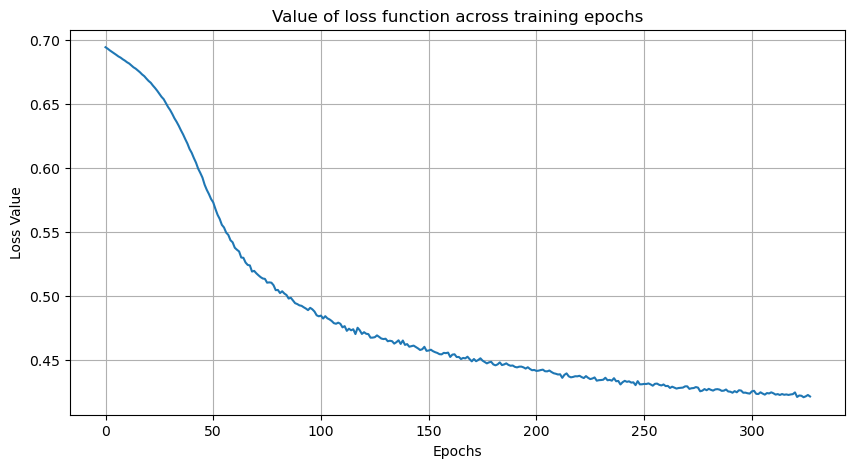

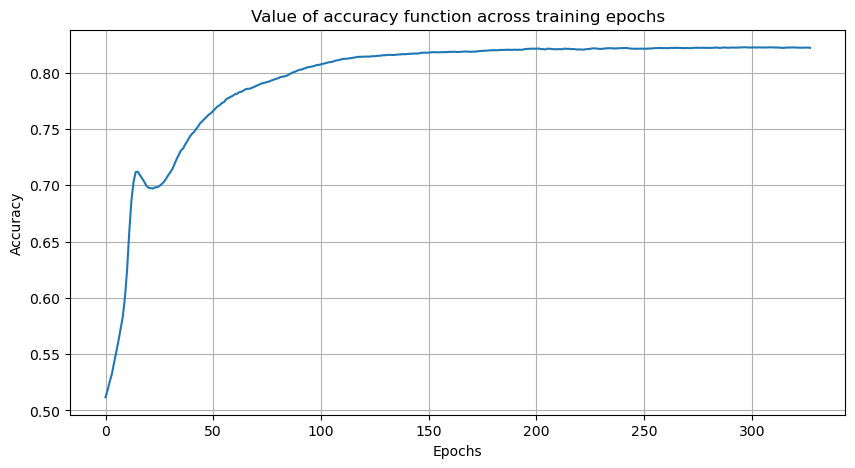

f1 score 0.8246510713583645
accuracy 0.8221335992023928


In [37]:
import nn_utils
nn_utils.lossplot(all_losses, scale='linear')
plt.show()
nn_utils.accplot(all_valid_accuracies)
plt.show()
print('f1 score', f1_score(target_y, predicted_labels))
print('accuracy',accuracy_score(target_y, predicted_labels))

In [38]:
def predict_with_pytorch(model, input_tensor):
    model.eval()  # Set the model to evaluation mode
    device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Check if CUDA is available
    model.to(device)  # Move model to the appropriate device
    
    input_tensor = input_tensor.to(device)  # Also, move the input tensor to the appropriate device
    
    with torch.no_grad():  # No need to track gradients for prediction
        output_tensor = model(input_tensor)
    
    return output_tensor.cpu()  # Return to CPU for compatibility with other operations (like numpy)


In [39]:
# Let's try to run the NN decisions on sigbgd
# reduce to desired features + output
dataset = sigbgd[features_plus + output]
print (dataset.shape)

data = dataset[features_plus].values
target = dataset[output].values
print (data.shape, target.shape)

column_to_drop = len(features_plus)-1
k = 1 # 0 for row, 1 for column
# data2 has the event-weight & reco-mass columns removed
data_tmp = np.delete(data, column_to_drop, k)
column_to_drop = len(features_plus)-2
data2 = np.delete(data_tmp, column_to_drop, k)

# data3 has their features scaled in preparation for the NN
data3 = sc.fit_transform(data2)

# Generates output predictions for the input samples.
predict_test_target = predict_with_pytorch(model, xNumpyToTensor(data3))
decision = (predict_test_target > 0.5)

testDF = pd.DataFrame(data, columns = features_plus)
testDF['isSignal'] = target
testDF['prediction'] = predict_test_target
testDF['decision'] = decision
print(testDF.head(5))
type(testDF[var])

(838653, 11)
(838653, 10) (838653, 1)
     lep1_pt     lep2_pt  fatjet_pt  fatjet_eta  fatjet_D2   Zll_mass  \
0  154208.36  121806.734  235357.22    0.661771   1.196634  93764.516   
1  311887.56  109948.240  325976.34   -0.289485   3.357398  87846.516   
2  231786.84  188307.340  433645.20   -0.165676   1.550515  88545.070   
3  142013.80  141101.770  243771.69   -0.738507  14.588237  88262.375   
4  360615.03  122592.280  660271.50   -0.142897   1.033690  91996.600   

      Zll_pt        MET  reco_zv_mass  FullEventWeight  isSignal  prediction  \
0  262358.16  14150.211      519642.0         1.565827         0    0.602254   
1  412685.40  25362.111      748183.7         0.713933         0    0.200300   
2  410751.62  59678.594     1061583.0         0.799246         0    0.906912   
3  273881.22  21939.936      546687.5         2.716457         0    0.031914   
4  482354.25  49996.863     1219062.0         0.733632         0    0.861547   

   decision  
0      True  
1     False  


pandas.core.series.Series

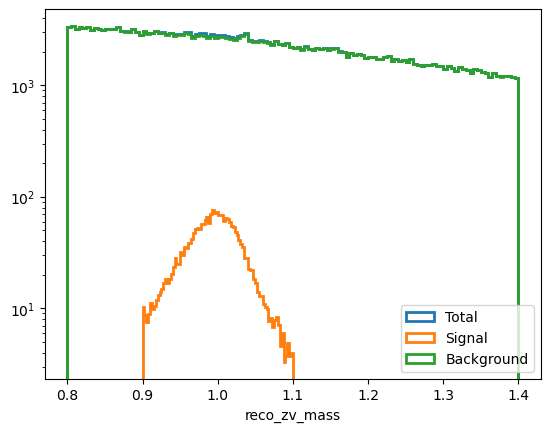

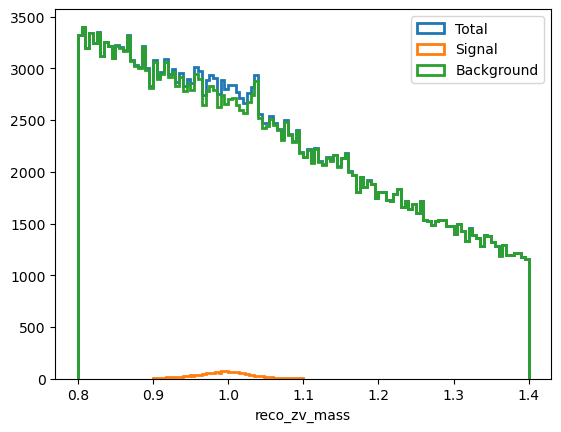

AFTER selection cuts + BEFORE classification:
# of weighted histogram events: Sig= 2,431.3 Bgd= 270,391.3 Total= 273,107.0


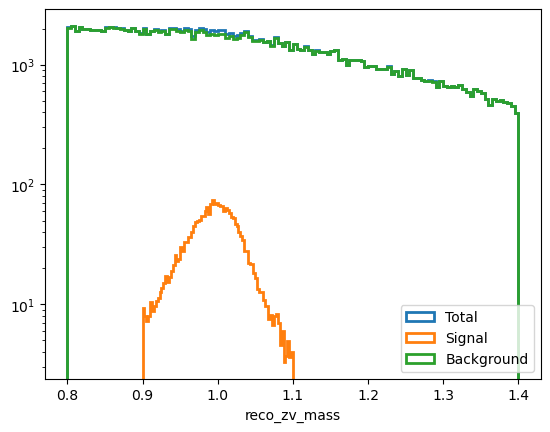

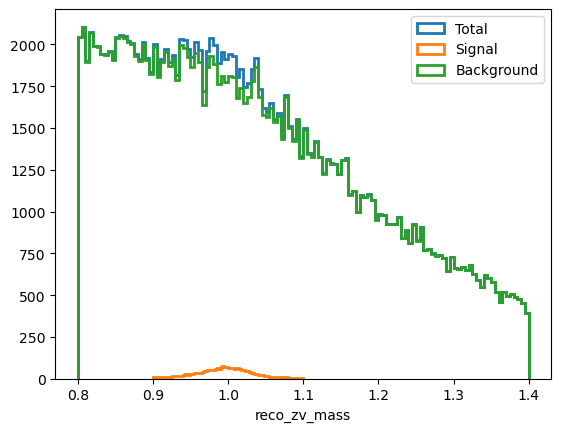

AFTER selectiomn cuts + AFTER classification:
# of weighted histogram events: Sig= 2,346.0 Bgd= 161,754.9 Total= 164,363.6


In [40]:
hdata, hdata_sig, hdata_bgd = plotSigBgd(xmin, xmax, nbins, testDF)
plt.yscale('log')
plt.show()

plotSigBgd(xmin, xmax, nbins, testDF)
plt.yscale('linear')
plt.show()


print("AFTER selection cuts + BEFORE classification:")
printNumEvents(nbins, hdata, hdata_sig, hdata_bgd)

testDF2 = testDF[(testDF.decision == True)]

hdata2, hdata_sig2, hdata_bgd2 = plotSigBgd(xmin, xmax, nbins, testDF2)
plt.yscale('log')
plt.show()

plotSigBgd(xmin, xmax, nbins, testDF2)
plt.yscale('linear')
plt.show()


print("AFTER selectiomn cuts + AFTER classification:")
printNumEvents(nbins, hdata2, hdata_sig2, hdata_bgd2)



In [26]:
### Exercise #3: Impact of training sample

In [27]:
print ("total # of entries =",sigbgd_nn.shape[0])
print ("# of signal entries in new DF =",len(sigbgd_nn[sigbgd_nn.isSignal == 1]))
print ("# of background entries in new DF =",len(sigbgd_nn[sigbgd_nn.isSignal == 0]))

total # of entries = 66864
# of signal entries in new DF = 33432
# of background entries in new DF = 33432


In [28]:
output = ['isSignal']
features = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET']
features_plus = features + [reco_mass] + [weight]

# reduce to desired features + output
dataset = sigbgd_nn[features_plus + output]
print (dataset.shape)

data = dataset[features_plus].values
target = dataset[output].values
print (data.shape, target.shape)

(66864, 11)
(66864, 10) (66864, 1)


In [29]:
print(len(features_plus))
print(features_plus)

10
['lep1_pt', 'lep2_pt', 'fatjet_pt', 'fatjet_eta', 'fatjet_D2', 'Zll_mass', 'Zll_pt', 'MET', 'reco_zv_mass', 'FullEventWeight']


In [30]:
# construct and train the NN
Answer_to_all_questions = 42

# train-test split of dataset
train_data, test_data, train_target, test_target = model_selection.train_test_split(
    data, target, test_size=0.30, random_state=Answer_to_all_questions)

print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

# train_data2 and test_data2 have the event-weight column removed
column_to_drop = len(features_plus)-1
k = 1 # 0 for row, 1 for column
train_data2 = np.delete(train_data, column_to_drop, k)
test_data2 = np.delete(test_data, column_to_drop, k)


print(train_data2.shape, train_target.shape, test_data2.shape, test_target.shape)

(46804, 10) (46804, 1) (20060, 10) (20060, 1)
(46804, 9) (46804, 1) (20060, 9) (20060, 1)


In [31]:
# train_data3 and test_data3 have their features scaled in preparation for the NN
train_data3 = sc.fit_transform(train_data2)
test_data3 = sc.fit_transform(test_data2)

In [32]:
train_data_tensor = xNumpyToTensor(train_data3)
train_target_tensor = yNumpyToTensor(train_target)
test_data_tensor = xNumpyToTensor(test_data3)
test_target_tensor = yNumpyToTensor(test_target)

In [33]:
dropout = nn.Dropout(p=0.2)

# num of outputs = 1
num_outputs = 1

# num of inputs = 8 or 9
num_inputs = 9

def my_model(num_inputs, num_nodes):
    model = nn.Sequential(
		nn.Linear(num_inputs, num_nodes), nn.ReLU(), dropout,
		nn.Linear(num_nodes, num_nodes), nn.ReLU(), dropout,
		nn.Linear(num_nodes, num_nodes), nn.ReLU(), dropout,  
		nn.Linear(num_nodes, num_outputs),
		nn.Sigmoid()
	)
    return model

In [34]:
batchSize = 1200
N_epochs = 800
num_nodes = 40

model = my_model(num_inputs, num_nodes)

In [35]:
# Train the model
# train the model
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
all_losses = []
all_valid_accuracies = []

best_accuracy = 0.0  # Best validation accuracy seen so far
no_improvement_epochs = 0  # Count epochs with no improvement in validation accuracy

In [36]:
#Training in batches
for step in range(N_epochs):    
    model.train()
    out = model(train_data_tensor)                 # input x and predict based on x
    cost = loss_fn(out, train_target_tensor) 
    optimizer.zero_grad()   # clear gradients for next train
    cost.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients 

    step_size = 10
 
    loss = cost.item()
    all_losses.append(loss)

    if step % step_size == 0:       
        print(step, cost.data.cpu().numpy())

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        prediction = model(test_data_tensor)  # probabilities
        predicted_labels = (prediction > 0.5).float()  # Convert probabilities to 0 or 1
        actual_labels = test_target_tensor
        accuracy = (predicted_labels.eq(actual_labels).sum() / float(actual_labels.nelement())).item()  # Calculate the accuracy
        all_valid_accuracies.append(accuracy)
        if step % step_size == 0:       
            print('Validation accuracy: {:.1f}%'.format(accuracy * 100))
        
        # RuntimeError: can't convert CUDA tensor to numpy (it doesn't support GPU arrays). 
        # Use .cpu() to move the tensor to host memory first.        
        ####prediction = (model(test_data_tensor).data).float() # probabilities                  
        pred_y = prediction.cpu().numpy().squeeze()
        target_y = test_target_tensor.cpu().data.numpy()
        if step % step_size == 0:       
            print ('LOG_LOSS={} '.format(log_loss(target_y, pred_y))) 

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        no_improvement_epochs = 0  # Reset count
    else:
        no_improvement_epochs += 1  # Increment no improvement count
        
    if no_improvement_epochs >= 30:
        print("Early stopping triggered after {} epochs.".format(step))
        break  # Exit the loop if no improvement in 10 consecutive checks
        




0 0.7006829
Validation accuracy: 50.3%
LOG_LOSS=0.6964095611323586 
10 0.68138933
Validation accuracy: 59.0%
LOG_LOSS=0.6775081924615162 
20 0.6626761
Validation accuracy: 74.0%
LOG_LOSS=0.6564509171273015 
30 0.6328617
Validation accuracy: 75.2%
LOG_LOSS=0.6212791281098636 
40 0.58662736
Validation accuracy: 77.5%
LOG_LOSS=0.5689594031286792 
50 0.53448004
Validation accuracy: 79.1%
LOG_LOSS=0.509333259330693 
60 0.49107984
Validation accuracy: 80.4%
LOG_LOSS=0.46120088085512434 
70 0.46285906
Validation accuracy: 81.7%
LOG_LOSS=0.43015084650858715 
80 0.44449434
Validation accuracy: 83.1%
LOG_LOSS=0.40733266028802584 
90 0.4260682
Validation accuracy: 84.1%
LOG_LOSS=0.38754245975104606 
100 0.40813297
Validation accuracy: 84.9%
LOG_LOSS=0.3710014397347541 
110 0.39433587
Validation accuracy: 85.6%
LOG_LOSS=0.35686754060577186 
120 0.37904647
Validation accuracy: 86.2%
LOG_LOSS=0.3449573871156452 
130 0.36961034
Validation accuracy: 86.6%
LOG_LOSS=0.33504623271263034 
140 0.35974768
V

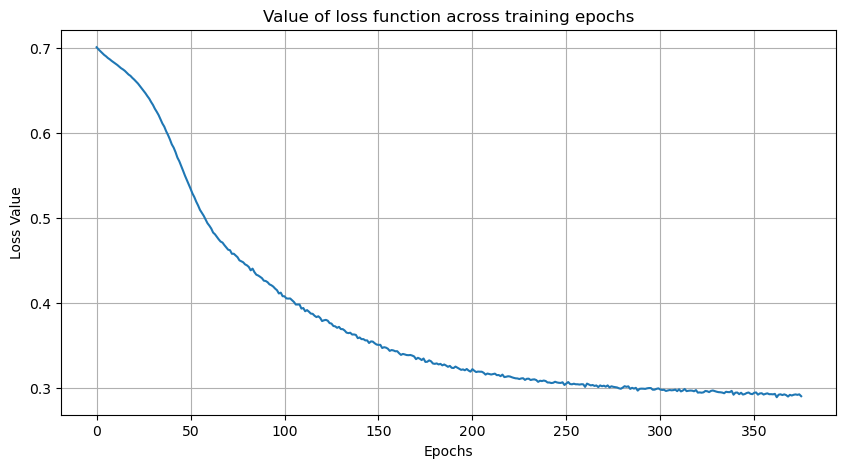

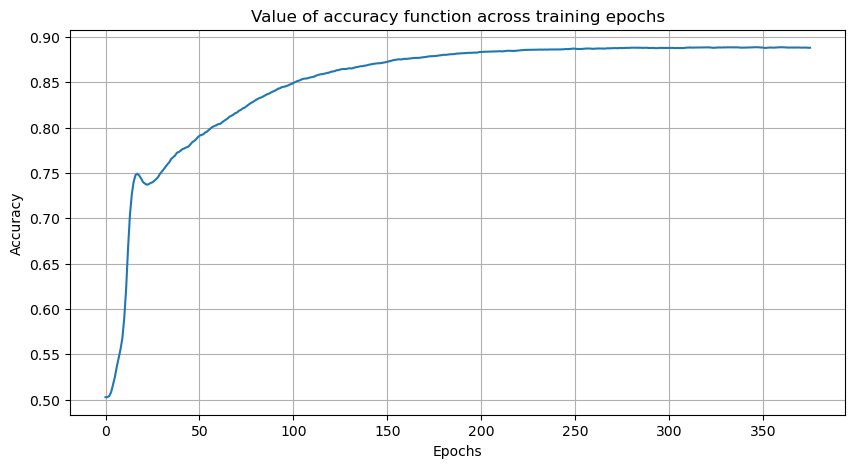

f1 score 0.8888999008919722
accuracy 0.888235294117647


In [37]:
nn_utils.lossplot(all_losses, scale='linear')
plt.show()
nn_utils.accplot(all_valid_accuracies)
plt.show()
print('f1 score', f1_score(target_y, predicted_labels))
print('accuracy',accuracy_score(target_y, predicted_labels))

In [38]:
# Let's try to run the NN decisions on sigbgd
# reduce to desired features + output
dataset = sigbgd[features_plus + output]
print (dataset.shape)

data = dataset[features_plus].values
target = dataset[output].values
print (data.shape, target.shape)

column_to_drop = len(features_plus)-1
k = 1 # 0 for row, 1 for column
# data2 has the event-weight column removed
data2 = np.delete(data, column_to_drop, k)

# data3 has their features scaled in preparation for the NN
data3 = sc.fit_transform(data2)

# Generates output predictions for the input samples.
predict_test_target = predict_with_pytorch(model, xNumpyToTensor(data3))
decision = (predict_test_target > 0.5)

testDF = pd.DataFrame(data, columns = features_plus)
testDF['isSignal'] = target
testDF['prediction'] = predict_test_target
testDF['decision'] = decision
print(testDF.head(5))
type(testDF[var])

(838653, 11)
(838653, 10) (838653, 1)
     lep1_pt     lep2_pt  fatjet_pt  fatjet_eta  fatjet_D2   Zll_mass  \
0  154208.36  121806.734  235357.22    0.661771   1.196634  93764.516   
1  311887.56  109948.240  325976.34   -0.289485   3.357398  87846.516   
2  231786.84  188307.340  433645.20   -0.165676   1.550515  88545.070   
3  142013.80  141101.770  243771.69   -0.738507  14.588237  88262.375   
4  360615.03  122592.280  660271.50   -0.142897   1.033690  91996.600   

      Zll_pt        MET  reco_zv_mass  FullEventWeight  isSignal  prediction  \
0  262358.16  14150.211      519642.0         1.565827         0    0.021771   
1  412685.40  25362.111      748183.7         0.713933         0    0.088568   
2  410751.62  59678.594     1061583.0         0.799246         0    0.937888   
3  273881.22  21939.936      546687.5         2.716457         0    0.045362   
4  482354.25  49996.863     1219062.0         0.733632         0    0.402477   

   decision  
0     False  
1     False  


pandas.core.series.Series

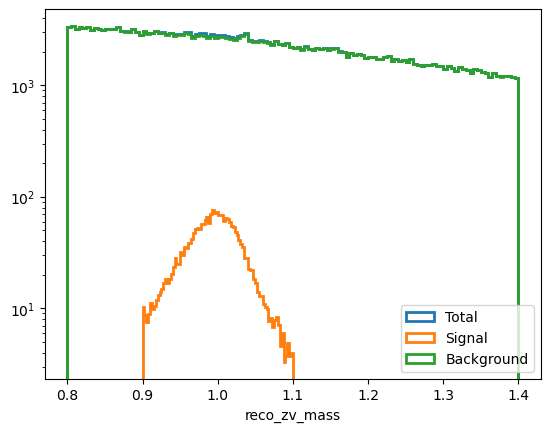

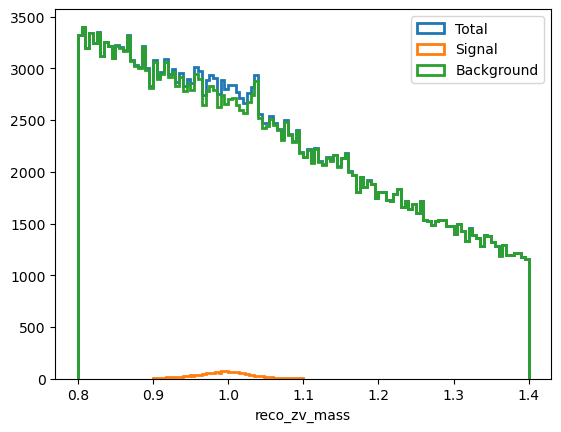

AFTER selectiomn cuts + BEFORE classification:
# of weighted histogram events: Sig= 2,431.3 Bgd= 270,391.3 Total= 273,107.0


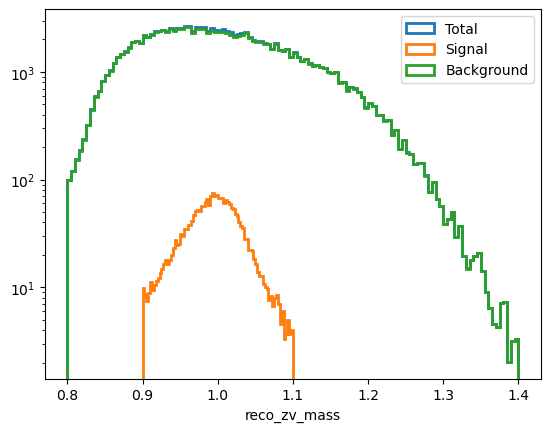

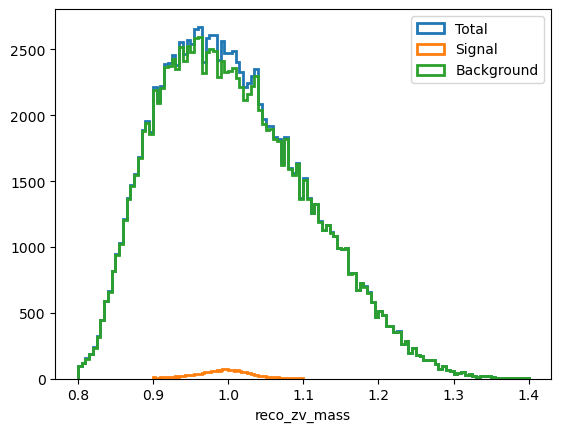

AFTER selectiomn cuts + AFTER classification:
# of weighted histogram events: Sig= 2,413.5 Bgd= 129,886.1 Total= 132,526.5


In [39]:
hdata, hdata_sig, hdata_bgd = plotSigBgd(xmin, xmax, nbins, testDF)
plt.yscale('log')
plt.show()

plotSigBgd(xmin, xmax, nbins, testDF)
plt.yscale('linear')
plt.show()


print("AFTER selectiomn cuts + BEFORE classification:")
printNumEvents(nbins, hdata, hdata_sig, hdata_bgd)

testDF2 = testDF[(testDF.decision == True)]

hdata2, hdata_sig2, hdata_bgd2 = plotSigBgd(xmin, xmax, nbins, testDF2)
plt.yscale('log')
plt.show()

plotSigBgd(xmin, xmax, nbins, testDF2)
plt.yscale('linear')
plt.show()


print("AFTER selectiomn cuts + AFTER classification:")
printNumEvents(nbins, hdata2, hdata_sig2, hdata_bgd2)